## Goal :  compare unitaries for same circuit and different cycles

In [1]:
import numpy as np
import trueq as tq
sim = tq.Simulator() #simulator object is always noiseless,  all initial states prepared as |0>


In [2]:
phi0=-30; phi1=80
gate0=tq.Gate.from_generators("Z", phi0)
gate1=tq.Gate.from_generators("Z", phi1)

cycA=tq.Cycle({0: gate0, 1: gate1}, marker=1)
cycB=tq.Cycle({0: tq.Gate.sx, 1: tq.Gate.sx}, marker=1)
circ1=tq.Circuit(cycles=[cycA,cycB])
circ1.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [3]:
cycA0=tq.Cycle({0: gate0}, marker=1)
cycB0=tq.Cycle({0: tq.Gate.sx}, marker=1)
cycA1=tq.Cycle({1: gate1}, marker=1)
cycB1=tq.Cycle({1: tq.Gate.sx}, marker=1)
circ2=tq.Circuit(cycles=[cycA0,cycB0,cycA1,cycB1])
circ2.draw()

DisplayWrapper(<svg xmlns="http://w...)

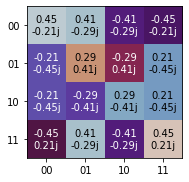

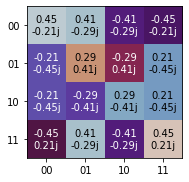

In [4]:
circ1Mat=sim.operator(circ1).mat()
tq.visualization.plot_mat(circ1Mat)

circ2Mat=sim.operator(circ2).mat()
tq.visualization.plot_mat(circ2Mat)

## compare untiaries of both circuits

phase=-0.663 kIdx= (0, 0) cell value= (0.3941660687176196-0.30762495066508655j)
phase=-0.436 kIdx= (0, 0) cell value= (0.45315389351832513-0.2113091308703498j)
M1 and M2 isSame= True


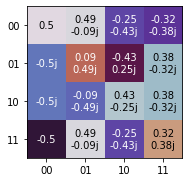

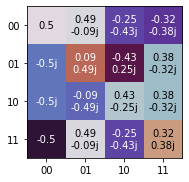

In [5]:
#...!...!..................
def unitaries_are_same(M1,M2):  
# check that equality between two unitaries holds up to an overall phase
    #... use M1 to select normalizaton bin
    A=np.abs(M1)
    kIdx=np.unravel_index(A.argmax(), A.shape)
    
    def scale_unitary(M,kIdx):
        v=M[kIdx[0],kIdx[1]] # complex max value
        phase=np.angle(v)
        fac=np.exp(-phase*1j)
        print('phase=%.3f'%phase,'kIdx=',kIdx,'cell value=',v)
        return M*fac
    M1s=scale_unitary(M1,kIdx)
    M2s=scale_unitary(M2,kIdx)
    isSame=np.allclose(M1s,M2s) or np.allclose(M1s,-M2s)  
    return isSame,M1s,M2s,kIdx

circ1Mat*=np.exp(12.34*1j) # add additional random phase to M1 for testing
isSame,M1s,M2s,_=unitaries_are_same(circ1Mat,circ2Mat) 
tq.visualization.plot_mat(M1s)
tq.visualization.plot_mat(M2s)
print('M1 and M2 isSame=',isSame)